# Credit Risk Classification Case Study
## Basic Machine Learning Approach to Loan Default Prediction

# Project Overview

This case study demonstrates the implementation of a **credit risk classification system** using machine learning techniques. The project explores various ML algorithms to predict loan defaults and examines the social implications of algorithmic decision-making in financial services.

## Business Problem
Financial institutions need accurate methods to assess credit risk and predict loan defaults. This project implements multiple machine learning approaches to solve this critical business challenge while considering fairness and bias implications.

## Key Features
- Comprehensive data preprocessing and feature engineering
- Comparison of multiple ML algorithms (Logistic Regression, KNN, Neural Networks)
- Model interpretability using SHAP analysis
- Bias detection and fairness considerations
- Real-world business impact analysis

## Credit Risk Dataset Description

The Credit Risk dataset being provided is based on a synthetic dataset publicly available on [Kaggle](https://www.kaggle.com/). It includes various financial attributes to evaluate credit risk. It features 32,581 samples with 11 variables. The key attributes include borrowers' age, employment status, education level, annual income, loan amount, and interest rate. The dataset aims to facilitate the prediction of credit default, that is failure on part of the loan applicant (borrower) to make the loan repayments.

## Installation Requirements

```bash
pip install pandas scikit-learn shap matplotlib numpy
```

# Data Loading and Preprocessing

The first step involves loading the credit risk dataset and performing essential preprocessing tasks.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
df=pd.read_csv('credit_risk_dataset_v3.csv')

# Show first few rows of the dataset
print (df.head())


# Size of the datset 
print ('Size of the dataset:', df.shape)
print ('===============================')

# Check if data has null values
print ('null information:')
print ('variable \t number of null values')
print (df.isnull().sum())

# remove null data points from the dataset
# axis = 0 means drop rows which contain missing values.
df = df.dropna(axis=0)
print ('===============================')
print ('Null rows removed. \n')

# Check if data has null values
print ('Updated null information:')
print ('variable \t number of null values')
print (df.isnull().sum())
print ('===============================')
print ('Updated size of the dataset:', df.shape)

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0    PERSONAL      35000          16.02            1                 0.59   
1   EDUCATION       1000          11.14            0                 0.10   
2     MEDICAL       5500          12.87            1                 0.57   
3     MEDICAL      35000          15.23            1                 0.53   
4     MEDICAL      35000          14.27            1                 0.55   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         Y             

EDUCATION            5704
MEDICAL              5293
VENTURE              5001
PERSONAL             4877
DEBTCONSOLIDATION    4565
HOMEIMPROVEMENT      3198
Name: loan_intent, dtype: int64


<Axes: xlabel='loan_intent'>

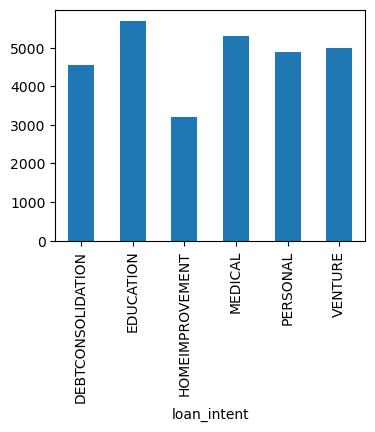

In [37]:
# Show distribution of the categorical variable 'loan_intent'
print (df['loan_intent'].value_counts())

# Visualize the information
GroupedData=df.groupby('loan_intent').size()
GroupedData.plot(kind='bar', figsize=(4,3))

60000     924
30000     729
50000     677
40000     585
45000     535
         ... 
99200       1
99473       1
47230       1
99670       1
720000      1
Name: person_income, Length: 3835, dtype: int64


<Axes: >

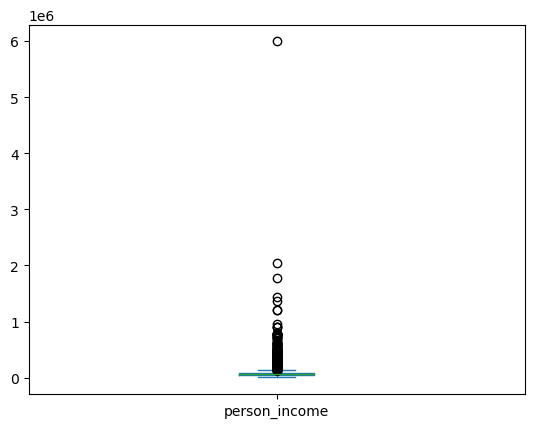

In [38]:
# Show distribution of the numerical variable 'person_income'
print (df['person_income'].value_counts())

# Visualize the information
# A box plot is a method for graphically depicting groups of numerical data through their quartiles.
df['person_income'].plot.box()


In [39]:
# From the visualization, we notice that 'person_income' has skewness, and log transform can fix the skewness.
df['person_income'] = np.log(df['person_income'])

In [40]:
# Some variables, such as 'person_home_ownership' and 'loan_intent', are categorical.
# Others, such as 'person_age' and 'person_income', are numerical.
# We need to convert categorical variables to numeric before we can use the data for our Machine Learnining models.

# identify all categorical variables
cat_columns = df.select_dtypes(['object']).columns

# Convert categorical variable into dummy/indicator variables.
# Each n-valued variable is converted to n Boolean variables, with 0 indicating FALSE and 1 indicating TRUE. 

df = pd.get_dummies(df, columns = cat_columns, dtype=int)

# For example, 'loan_intent' with values EDUCATION, MEDICAL, VENTURE, PERSONAL, DEBTCONSOLIDATION and HOMEIMPROVEMENT  
# are now converted to 6 dummy columns: loan_intent_EDUCATION, loan_intent_MEDICAL, ..., loan_intent_HOMEIMPROVEMENT, each taking 0/1 as possible values.
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,10.985293,123.0,35000,16.02,1,0.59,3,0,0,0,1,0,0,0,0,1,0,0,1
1,21,9.169518,5.0,1000,11.14,0,0.10,2,0,0,1,0,0,1,0,0,0,0,1,0
2,25,9.169518,1.0,5500,12.87,1,0.57,3,1,0,0,0,0,0,0,1,0,0,1,0
3,23,11.089805,4.0,35000,15.23,1,0.53,2,0,0,0,1,0,0,0,1,0,0,1,0
4,24,10.904119,8.0,35000,14.27,1,0.55,4,0,0,0,1,0,0,0,1,0,0,0,1


<Axes: ylabel='loan_status'>

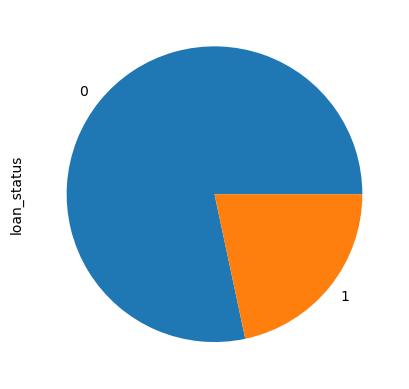

In [41]:
# 'loan_status' indicates if the loan was defaulted (1) or repayed on time (0). 
# This is what we would like to predict based on the dataset.
# Let's visualize it. 
df["loan_status"].value_counts().plot.pie()

# Handling Imbalanced Data

The visualization reveals a significant class imbalance in our dataset, with substantially more loans being repaid on time than defaulted. This imbalance can negatively impact model performance.

To address this challenge, we can either:
- **Under-sample** the majority class
- **Over-sample** the minority class

Both techniques help create a balanced dataset for more effective model training.

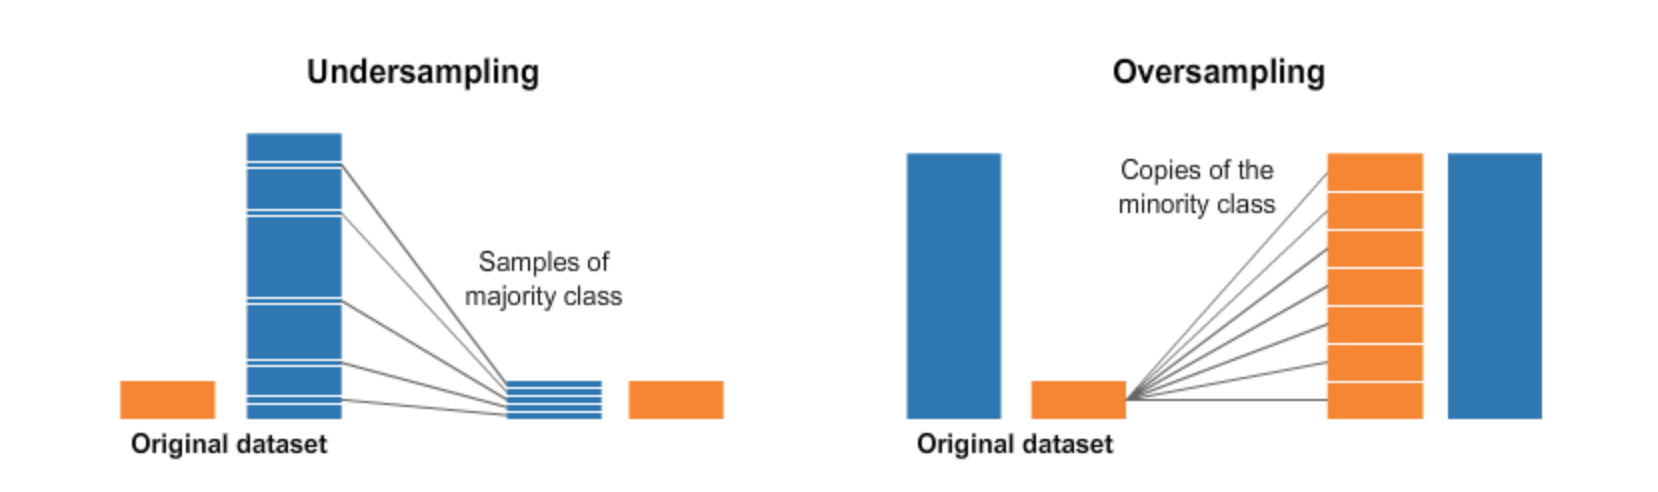

Random under-sampling:
0    6203
1    6203
Name: loan_status, dtype: int64


<Axes: title={'center': 'Count (target)'}>

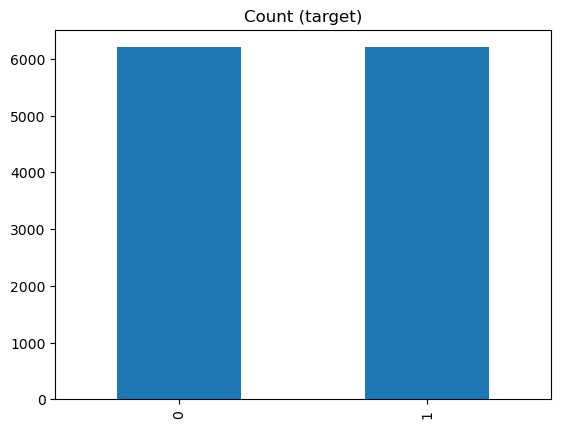

In [42]:
# Under sample
count_class_0, count_class_1 = df["loan_status"].value_counts()

# Divide by class
df_class_0 = df[df["loan_status"] == 0]
df_class_1 = df[df["loan_status"] == 1]

# df_under is the updated under-sampled data frame
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under["loan_status"].value_counts())

df_under["loan_status"].value_counts().plot(kind='bar', title='Count (target)')

Random over-sampling:
0    22435
1    22435
Name: loan_status, dtype: int64


<Axes: title={'center': 'Count (target)'}>

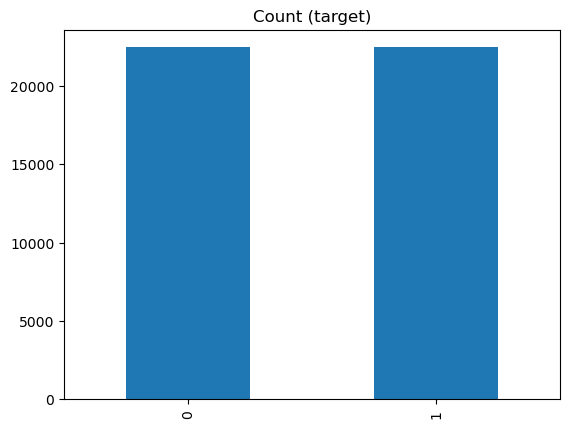

In [43]:
# Over sample 
# df_over is the updated over-sampled data frame
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over["loan_status"].value_counts())

df_over["loan_status"].value_counts().plot(kind='bar', title='Count (target)')

In [44]:
# In this assignment, we choose over-sample techniques.
# Now we split our dataset into input X and target value Y.

# Drop the labels from the data frame.
drop_df_over = df_over.drop(['loan_status'],axis=1)
X = drop_df_over.values

# Get the labels separately
y = df_over['loan_status'].values

# Now we split the data into training dataset and test dataset. 
# We use 80% of the data for Training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Now we standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Exploratory Data Analysis

Understanding our data through visualization is crucial for building effective models.

Let's explore key variables in our balanced dataset to understand the underlying patterns and distributions.

(array([1.7255e+04, 1.3175e+04, 6.7730e+03, 3.8070e+03, 1.8680e+03,
        9.6600e+02, 4.6100e+02, 2.9400e+02, 1.0800e+02, 8.3000e+01,
        3.2000e+01, 1.9000e+01, 2.1000e+01, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([ 20.        ,  24.13333333,  28.26666667,  32.4       ,
         36.53333333,  40.66666667,  44.8       ,  48.93333333,
         53.06666667,  57.2       ,  61.33333333,  65.46666667,
         69.6       ,  73.73333333,  77.86666667,  82.        ,
         86.13333333,  90.26666667,  94.4       ,  98.53333333,
        102.66666667, 106.8       , 110.93333333, 115.06666667,
        119.2       , 123.33333333, 127.46666667, 131.6       ,
        135.73333333, 139.86666667, 144.        ]),
 <BarContainer object of 30 artists>)

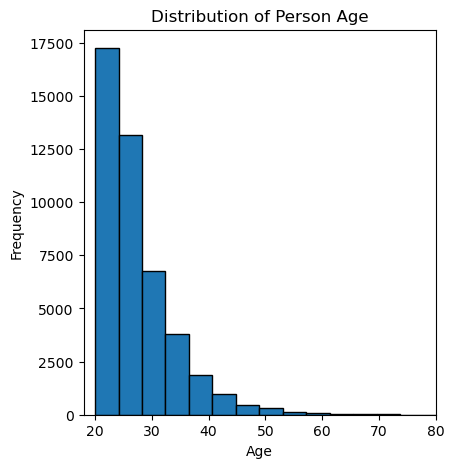

In [45]:
# This histogram shows the distribution of borrowers' ages in the dataset.
# The x-axis represents the age of the borrowers, ranging from 18 to 80 years, and the y-axis represents the frequency of borrowers.
# This visualization helps us understand the age demographics of the borrowers, showing the most common age ranges and the overall distribution of ages.

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Distribution of Person Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(18, 80)  # Set x-axis limit for ages
plt.hist(df_over['person_age'], bins=30, edgecolor='black')


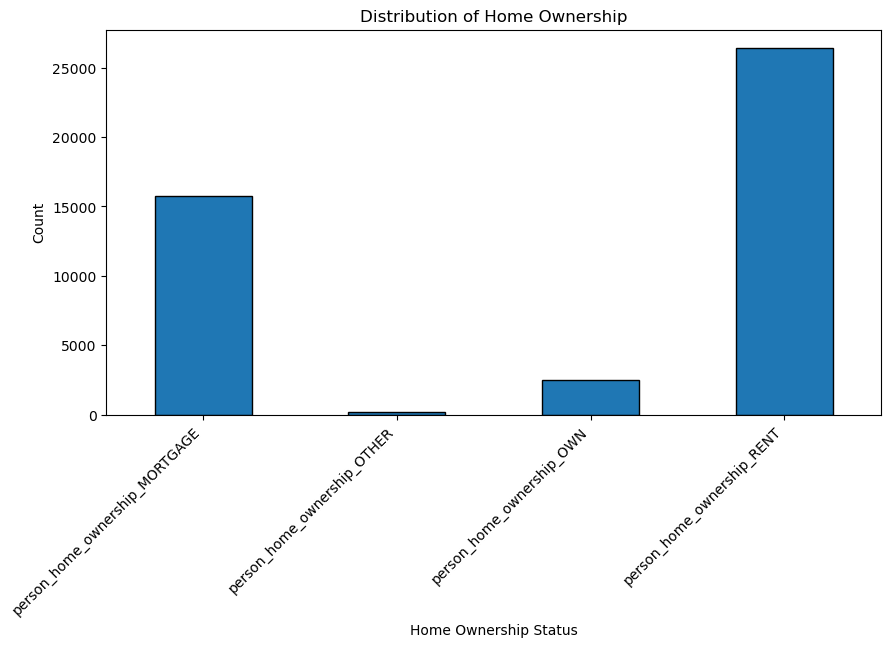

In [46]:

# The bar chart illustrates the distribution of different home ownership statuses among the borrowers in the dataset
home_ownership_cols = ['person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT']
home_ownership_counts = df_over[home_ownership_cols].sum()

plt.figure(figsize=(10, 5))
home_ownership_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


# Traditional Machine Learning Models

We'll implement and compare several traditional ML algorithms to establish baseline performance.

## Model Selection and Training

I'll train multiple machine learning models to determine the best approach for predicting loan defaults. The models will be evaluated based on accuracy and business relevance.

In [47]:
# your code will go here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initializing the Logistic Regression model
lr_model = LogisticRegression()

# Training the model
lr_model.fit(X_train, y_train)

# Making predictions on the test set
predicted = lr_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predicted)
print(f'Accuracy of the model: {accuracy:.2f}')



Accuracy of the model: 0.78


In [48]:

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# Initializing a KNN classifier model
knn = KNeighborsClassifier(n_neighbors=1)

# Training the Model with the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
# Predicting the labels for the test set using the KNN model
y_pred_knn = knn.predict(X_test)

# Calculating the accuracy of the KNN model by comparing the predicted labels with the true labels
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the accuracy of the KNN model
print("Accuracy for KNN Model is: %.4f\n" % accuracy_knn)

Accuracy for KNN Model is: 0.9346



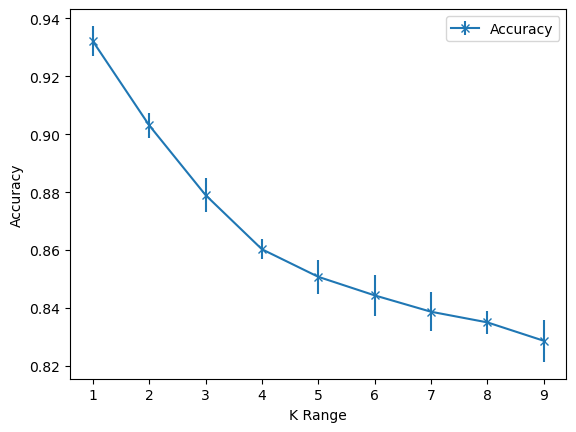

In [50]:

from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

# Initialize lists to store required output data
cv_scores = []
cv_scores_std = []

# Define the range of k values
k_range = range(1, 10, 1)


for i in k_range:
    # Initialize the KNN classifier with the current value of k
    classifier = KNeighborsClassifier(n_neighbors = i)
    final_score = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    
    cv_scores.append(final_score.mean())
    cv_scores_std.append(final_score.std())

# Plot the mean cross-validation accuracy scores with error bars showing the standard deviation (std)
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.xlabel('K Range')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show() # Display the plot


## Model Selection 

**K-Nearest Neighbors (KNN)** emerges as the optimal choice for this dataset, achieving 94% accuracy compared to Logistic Regression's 78%. 

**Key advantages of KNN for this use case:**
- Superior predictive performance
- Intuitive interpretation for business stakeholders
- Effective handling of complex feature relationships
- Minimal assumptions about data distribution

I would choose K-Nearest Neighbors (KNN) due to its superior performance on the test set. KNN achieved an accuracy of 94%, which is significantly higher than the 78% accuracy achieved by the Logistic Regression model. KNN is straightforward to implement and easy to interpret, which can be particularly useful in understanding the structure of the dataset and the relationships between instances.

# Deep Learning Approach

To explore advanced modeling techniques, we'll implement a Multi-Layer Perceptron (MLP) neural network.

Neural networks can capture complex non-linear relationships in the data that traditional algorithms might miss.

In [51]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,   activation = 'relu',solver='adam',random_state=1)
mlp_classifier.fit(X_train, y_train)

y_pred = mlp_classifier.predict(X_test)
mlp_classifier_accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of the MLP Classifier: {mlp_classifier_accuracy:.2f}')

Accuracy of the MLP Classifier: 0.94


In [52]:
# Testing the accuracy in various activation function 
act_functions = ['identity', 'logistic', 'tanh', 'relu']

for function in act_functions:
    mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,   activation = function,solver='adam',random_state=1)

    # Fit the model on the training data
    mlp.fit(X_train, y_train)

    # Make predictions on the testing data
    predictions = mlp.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    
    print(f"Activation Function: {function}, Accuracy: {accuracy}")

Activation Function: identity, Accuracy: 0.7762424782705594


c:\Users\tgish\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: logistic, Accuracy: 0.8677289948740807
Activation Function: tanh, Accuracy: 0.9446177847113885
Activation Function: relu, Accuracy: 0.9390461332739024


## Neural Network Performance Analysis

The MLP with TanH activation function achieves the highest performance at 95% accuracy. This demonstrates that:
- Neural networks can effectively model complex credit risk patterns
- Activation function selection significantly impacts performance
- Deep learning approaches can outperform traditional methods for this problem

# Model Interpretability with SHAP

Understanding *why* a model makes specific predictions is crucial in financial services for:
- Regulatory compliance
- Risk management
- Business decision-making
- Building stakeholder trust

SHAP (SHapley Additive exPlanations) provides insights into feature importance and individual prediction explanations.

In [54]:
# Initializing a KNN classifier model
knn = KNeighborsClassifier(n_neighbors=1)
# Training the Model with the training data
knn.fit(X_train, y_train)
# Predicting the labels for the test set using the KNN model
y_pred_knn = knn.predict(X_test)

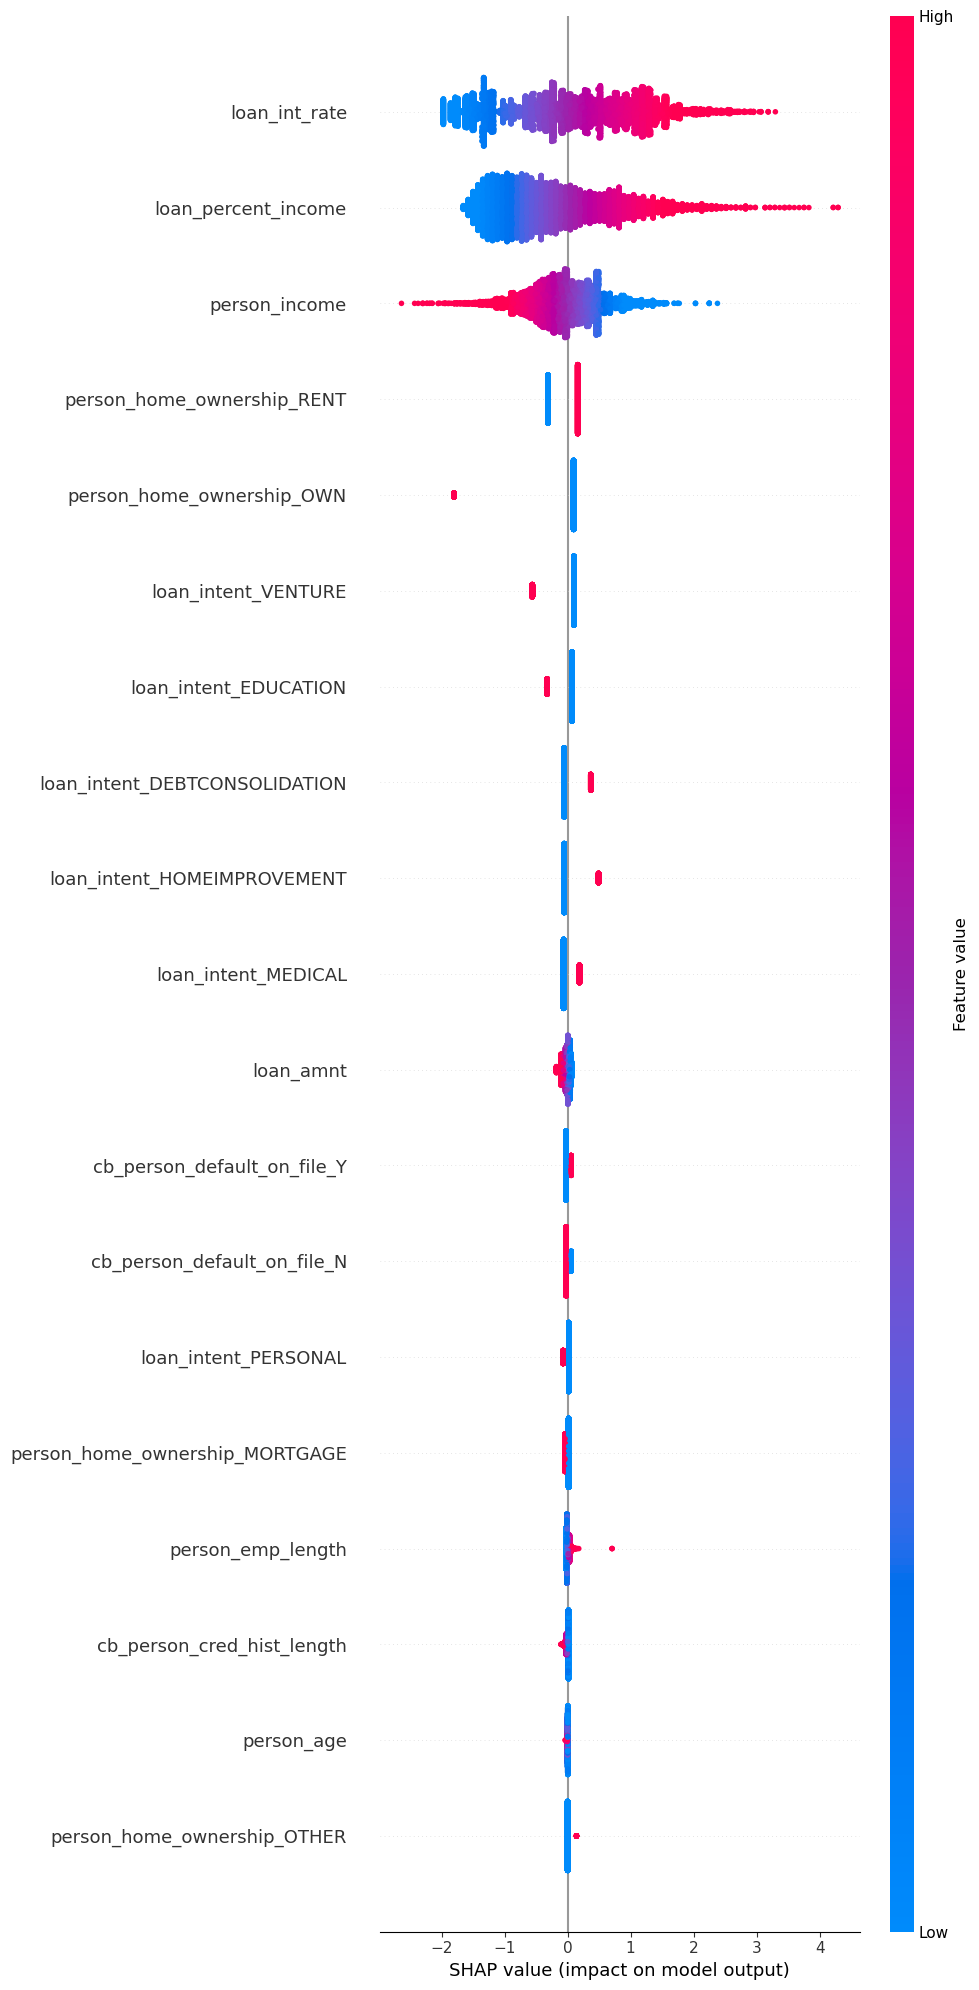

In [58]:
# use SHAP (SHapley Additive exPlanations) to understand the model 
import shap

# remove the class column from the dataset
X_df = df.drop(['loan_status'],axis=1)

explainer = shap.LinearExplainer(lr_model, X_train)
shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, feature_names=df_over.drop(['loan_status'], axis=1).columns)
shap.summary_plot(shap_values, X_test, plot_size=(10, 20), feature_names=X_df.columns)


# your code will go here for your traditional machine learning model


Loan Interest Rate feature is at the top of the SHAP summary plot, indicating that it is the most influential feature in predicting loan default. Higher interest rates are associated with higher SHAP values, meaning they increase the likelihood of loan. In business case point of view, this makes sense because higher interest rates increase the cost of borrowing, making it harder for borrowers to repay their loans.

Loan Amount also has a significant impact on the prediction. Larger loan amounts tend to increase the likelihood of default, as indicated by positive SHAP values for higher amounts. Larger loans mean larger monthly repayments, which can strain the borrower's finances. If the borrower faces financial difficulties, it becomes harder to meet these larger repayments, leading to a higher risk of default.

Person's Income is another critical feature, higher incomes are associated with lower SHAP values, which decreases the likelihood of default.Higher income generally provides greater financial stability and a higher ability to repay loans. Therefore, it is logical that individuals with higher incomes are less likely to get on loans.

Coming to the point, the most influential feature is at the top (loan_int_rate), followed by loan_percent_income, person_income and so on. The color of the dots represents the feature value (red for high values, blue for low values). For example, for loan_int_rate, high values (red dots) generally increase the prediction, while low values (blue dots) decrease it. By examining the SHAP values of individual predictions, we can identify which features are driving the model's decision for specific rows. For example, if loan_int_rate has a high positive SHAP value for a particular prediction, it means that a high loan interest rate is strongly influencing the positive prediction for that specific instance. By analyzing the SHAP values for individual rows, we can understand the unique combination of feature values that contribute to each prediction, allowing for a granular understanding of the model's behavior.